## Setting the Tensorflow Version

In [ ]:
%tensorflow_version 2.x

## Importing Libraries

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import os
from builtins import range
from six.moves import cPickle as pickle
import cv2
from keras.utils import to_categorical
import platform
import tensorflow as tf

In [ ]:
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz
!del cifar-10-python.tar.gz

--2021-03-18 11:13:27--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  95.2MB/s    in 1.7s    

2021-03-18 11:13:29 (95.2 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1
/bin/bash: del: command not found


In [ ]:
def load_pickle(f):
  version=platform.python_version_tuple()
  if version[0]=='2':
    return pickle.load(f)
  elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
  raise ValueError("invalid python version: {}".format(version))  


def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1)
        Y=np.array(Y)
        return X, Y  

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

cifar10_dir = 'cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times
try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
except:
    pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
X_train=X_train/255.0
X_test=X_test/255.0
#Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(max(list(X_train[0])))
# As a sanity check, we print out the size of the training and test data.
print('Training data : ', X_train.shape)
print('Training labels: ', y_train.shape)
print('Test data: ', X_test.shape)
print('Test labels: ', y_test.shape)

1.0
Training data :  (50000, 3072)
Training labels:  (50000,)
Test data:  (10000, 3072)
Test labels:  (10000,)


In [ ]:
y_train.shape

(50000,)

In [ ]:
X_train

array([[0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
        0.28235294],
       [0.60392157, 0.69411765, 0.73333333, ..., 0.56078431, 0.52156863,
        0.56470588],
       [1.        , 1.        , 1.        , ..., 0.31372549, 0.3372549 ,
        0.32941176],
       ...,
       [0.1372549 , 0.69803922, 0.92156863, ..., 0.04705882, 0.12156863,
        0.19607843],
       [0.74117647, 0.82745098, 0.94117647, ..., 0.76470588, 0.74509804,
        0.67058824],
       [0.89803922, 0.89803922, 0.9372549 , ..., 0.63921569, 0.63921569,
        0.63137255]])

In [ ]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

In [ ]:
y_train

array([6, 9, 9, ..., 9, 1, 1])

## Model 1

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(X_train.shape[1:])),
                           tf.keras.layers.Dense(2000,activation='relu'),
                           tf.keras.layers.Dense(10,activation='softmax')])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
hist=model.fit(X_train, y_train, epochs=10,batch_size=32,validation_split=0.3)

Epoch 1/10
1094/1094 [==============================] - 7s 4ms/step - loss: 2.5281 - accuracy: 0.2643 - val_loss: 1.8088 - val_accuracy: 0.3417
Epoch 2/10
1094/1094 [==============================] - 4s 3ms/step - loss: 1.7577 - accuracy: 0.3653 - val_loss: 1.7257 - val_accuracy: 0.3813
Epoch 3/10
1094/1094 [==============================] - 4s 3ms/step - loss: 1.6697 - accuracy: 0.4024 - val_loss: 1.7015 - val_accuracy: 0.4014
Epoch 4/10
1094/1094 [==============================] - 4s 3ms/step - loss: 1.6125 - accuracy: 0.4227 - val_loss: 1.6486 - val_accuracy: 0.4189
Epoch 5/10
1094/1094 [==============================] - 4s 3ms/step - loss: 1.5672 - accuracy: 0.4427 - val_loss: 1.6384 - val_accuracy: 0.4254
Epoch 6/10
1094/1094 [==============================] - 4s 3ms/step - loss: 1.5485 - accuracy: 0.4498 - val_loss: 1.5889 - val_accuracy: 0.4331
Epoch 7/10
1094/1094 [==============================] - 4s 3ms/step - loss: 1.5135 - accuracy: 0.4617 - val_loss: 1.5681 - val_accuracy:

In [ ]:
prediction_score = model.evaluate(X_test, y_test, verbose=0)

print('Test Loss and Test Accuracy', prediction_score)


Test Loss and Test Accuracy [1.548233151435852, 0.4584999978542328]


## Model 2

In [ ]:
model1=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=X_train.shape[1:]),
                           tf.keras.layers.Dense(2000,activation='elu'),
                           tf.keras.layers.Dense(1500,activation='elu'),
                           tf.keras.layers.Dense(1000,activation='elu'),
                           tf.keras.layers.Dense(10,activation='softmax')])

In [ ]:
model1.compile(optimizer='Adagrad',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
hist1=model1.fit(X_train, y_train, epochs=10,batch_size=64,validation_split=0.3)

Epoch 1/10
547/547 [==============================] - 3s 5ms/step - loss: 2.0633 - accuracy: 0.2496 - val_loss: 1.8741 - val_accuracy: 0.3437
Epoch 2/10
547/547 [==============================] - 3s 5ms/step - loss: 1.8293 - accuracy: 0.3587 - val_loss: 1.7934 - val_accuracy: 0.3709
Epoch 3/10
547/547 [==============================] - 3s 5ms/step - loss: 1.7557 - accuracy: 0.3904 - val_loss: 1.7852 - val_accuracy: 0.3808
Epoch 4/10
547/547 [==============================] - 3s 5ms/step - loss: 1.7336 - accuracy: 0.4016 - val_loss: 1.7508 - val_accuracy: 0.3900
Epoch 5/10
547/547 [==============================] - 3s 5ms/step - loss: 1.7076 - accuracy: 0.4039 - val_loss: 1.7282 - val_accuracy: 0.4058
Epoch 6/10
547/547 [==============================] - 3s 5ms/step - loss: 1.6823 - accuracy: 0.4153 - val_loss: 1.7179 - val_accuracy: 0.4011
Epoch 7/10
547/547 [==============================] - 3s 5ms/step - loss: 1.6699 - accuracy: 0.4201 - val_loss: 1.7062 - val_accuracy: 0.4115
Epoch 

In [ ]:
prediction_score = model1.evaluate(X_test, y_test, verbose=0)

print('Test Loss and Test Accuracy', prediction_score)

Test Loss and Test Accuracy [1.6267603635787964, 0.43720000982284546]


## Model 3

In [ ]:
model2=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=X_train.shape[1:]),
                           tf.keras.layers.Dense(2000,activation='selu'),
                           tf.keras.layers.Dense(1500,activation='selu'),
                           tf.keras.layers.Dense(1000,activation='selu'),
                           tf.keras.layers.Dense(10,activation='softmax')])

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
hist2=model2.fit(X_train, y_train, epochs=10,batch_size=128,validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 2s 8ms/step - loss: 2.1049 - accuracy: 0.2417 - val_loss: 1.9530 - val_accuracy: 0.3207
Epoch 2/10
274/274 [==============================] - 2s 7ms/step - loss: 1.8139 - accuracy: 0.3560 - val_loss: 1.8973 - val_accuracy: 0.3124
Epoch 3/10
274/274 [==============================] - 2s 7ms/step - loss: 1.7488 - accuracy: 0.3833 - val_loss: 1.7725 - val_accuracy: 0.3641
Epoch 4/10
274/274 [==============================] - 2s 7ms/step - loss: 1.7171 - accuracy: 0.4008 - val_loss: 1.7681 - val_accuracy: 0.3935
Epoch 5/10
274/274 [==============================] - 2s 7ms/step - loss: 1.6798 - accuracy: 0.4145 - val_loss: 1.8138 - val_accuracy: 0.3553
Epoch 6/10
274/274 [==============================] - 2s 7ms/step - loss: 1.6480 - accuracy: 0.4216 - val_loss: 1.7331 - val_accuracy: 0.3801
Epoch 7/10
274/274 [==============================] - 2s 7ms/step - loss: 1.6258 - accuracy: 0.4307 - val_loss: 1.7492 - val_accuracy: 0.3698
Epoch 

In [ ]:
prediction_score = model2.evaluate(X_test, y_test, verbose=0)

print('Test Loss and Test Accuracy', prediction_score)

Test Loss and Test Accuracy [1.6307477951049805, 0.4237000048160553]


## Model 4

In [ ]:
model3=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=X_train.shape[1:]),
                           tf.keras.layers.Dense(2000,activation='softplus'),
                           tf.keras.layers.Dense(1000,activation='softplus'),
                           tf.keras.layers.Dense(500,activation='softplus'),
                           tf.keras.layers.Dense(10,activation='softmax')])

In [ ]:
model3.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
hist3=model3.fit(X_train, y_train, epochs=10,batch_size=128,validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 2s 5ms/step - loss: 2.2671 - accuracy: 0.1546 - val_loss: 2.1065 - val_accuracy: 0.2105
Epoch 2/10
274/274 [==============================] - 1s 5ms/step - loss: 2.0537 - accuracy: 0.2449 - val_loss: 1.9691 - val_accuracy: 0.2904
Epoch 3/10
274/274 [==============================] - 1s 5ms/step - loss: 1.9703 - accuracy: 0.2886 - val_loss: 2.0120 - val_accuracy: 0.2691
Epoch 4/10
274/274 [==============================] - 1s 5ms/step - loss: 1.9239 - accuracy: 0.3072 - val_loss: 2.0174 - val_accuracy: 0.2669
Epoch 5/10
274/274 [==============================] - 1s 5ms/step - loss: 1.8951 - accuracy: 0.3220 - val_loss: 1.9347 - val_accuracy: 0.3041
Epoch 6/10
274/274 [==============================] - 1s 5ms/step - loss: 1.8753 - accuracy: 0.3295 - val_loss: 2.0986 - val_accuracy: 0.2263
Epoch 7/10
274/274 [==============================] - 1s 5ms/step - loss: 1.8663 - accuracy: 0.3372 - val_loss: 1.9323 - val_accuracy: 0.3065
Epoch 

In [ ]:
prediction_score = model3.evaluate(X_test, y_test, verbose=0)

print('Test Loss and Test Accuracy', prediction_score)

Test Loss and Test Accuracy [1.8055545091629028, 0.3644999861717224]


## Model 5

In [ ]:
model4=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=X_train.shape[1:]),
                           tf.keras.layers.Dense(2000,activation='softplus'),
                           tf.keras.layers.Dense(1500,activation='softplus'),
                           tf.keras.layers.Dense(1000,activation='softplus'),
                           tf.keras.layers.Dense(10,activation='softmax')])

In [ ]:
model4.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
hist4=model4.fit(X_train, y_train, epochs=10,batch_size=128,validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 2s 7ms/step - loss: 2.3046 - accuracy: 0.1498 - val_loss: 2.0645 - val_accuracy: 0.2638
Epoch 2/10
274/274 [==============================] - 2s 6ms/step - loss: 2.0330 - accuracy: 0.2629 - val_loss: 1.9490 - val_accuracy: 0.3131
Epoch 3/10
274/274 [==============================] - 2s 6ms/step - loss: 1.9382 - accuracy: 0.3040 - val_loss: 1.9210 - val_accuracy: 0.3131
Epoch 4/10
274/274 [==============================] - 2s 6ms/step - loss: 1.9137 - accuracy: 0.3144 - val_loss: 1.8771 - val_accuracy: 0.3395
Epoch 5/10
274/274 [==============================] - 2s 6ms/step - loss: 1.8766 - accuracy: 0.3297 - val_loss: 1.8587 - val_accuracy: 0.3489
Epoch 6/10
274/274 [==============================] - 2s 6ms/step - loss: 1.8663 - accuracy: 0.3365 - val_loss: 1.8599 - val_accuracy: 0.3486
Epoch 7/10
274/274 [==============================] - 2s 6ms/step - loss: 1.8258 - accuracy: 0.3525 - val_loss: 1.8730 - val_accuracy: 0.3419
Epoch 

In [ ]:
prediction_score = model4.evaluate(X_test, y_test, verbose=0)

print('Test Loss and Test Accuracy', prediction_score)

Test Loss and Test Accuracy [1.7876827716827393, 0.36730000376701355]


In [ ]:
model5=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=X_train.shape[1:]),
                           tf.keras.layers.Dense(2000,activation='relu'),
                           tf.keras.layers.Dense(2000,activation='tanh'),
                           tf.keras.layers.Dense(1500,activation='tanh'),
                           tf.keras.layers.Dense(1000,activation='softplus'),
                           tf.keras.layers.Dense(600,activation='softplus'),
                           tf.keras.layers.Dense(10,activation='softmax')])

In [ ]:
model5.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9,nesterov=True),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
hist5=model5.fit(X_train, y_train, epochs=10,batch_size=128,validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 3s 8ms/step - loss: 2.2332 - accuracy: 0.1980 - val_loss: 1.9388 - val_accuracy: 0.3241
Epoch 2/10
274/274 [==============================] - 2s 8ms/step - loss: 1.8974 - accuracy: 0.3336 - val_loss: 1.8455 - val_accuracy: 0.3513
Epoch 3/10
274/274 [==============================] - 2s 7ms/step - loss: 1.7984 - accuracy: 0.3691 - val_loss: 1.7681 - val_accuracy: 0.3844
Epoch 4/10
274/274 [==============================] - 2s 8ms/step - loss: 1.7256 - accuracy: 0.3928 - val_loss: 1.7413 - val_accuracy: 0.3867
Epoch 5/10
274/274 [==============================] - 2s 8ms/step - loss: 1.6837 - accuracy: 0.4037 - val_loss: 1.6740 - val_accuracy: 0.4045
Epoch 6/10
274/274 [==============================] - 2s 8ms/step - loss: 1.6248 - accuracy: 0.4293 - val_loss: 1.6430 - val_accuracy: 0.4196
Epoch 7/10
274/274 [==============================] - 2s 7ms/step - loss: 1.5836 - accuracy: 0.4359 - val_loss: 1.6146 - val_accuracy: 0.4318
Epoch 

In [ ]:
prediction_score = model5.evaluate(X_test, y_test, verbose=0)

print('Test Loss and Test Accuracy', prediction_score)

Test Loss and Test Accuracy [1.556388258934021, 0.44909998774528503]


In [ ]:
model6=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=X_train.shape[1:]),
                           tf.keras.layers.Dense(2000,activation='relu'),
                           tf.keras.layers.Dropout(0.25), 
                           tf.keras.layers.Dense(2000,activation='tanh'),
                           tf.keras.layers.Dropout(0.25), 
                           tf.keras.layers.BatchNormalization(),
                           tf.keras.layers.Dense(1000,activation='sigmoid'),
                           tf.keras.layers.Dropout(0.25), 
                           tf.keras.layers.Dense(600,activation='softplus'),
                           tf.keras.layers.Dense(10,activation='softmax')])

In [ ]:
model6.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9,nesterov=True),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
hist6=model6.fit(X_train, y_train, epochs=10,batch_size=128,validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 3s 8ms/step - loss: 2.2809 - accuracy: 0.1617 - val_loss: 1.9612 - val_accuracy: 0.3293
Epoch 2/10
274/274 [==============================] - 2s 7ms/step - loss: 1.9425 - accuracy: 0.3015 - val_loss: 1.8154 - val_accuracy: 0.3634
Epoch 3/10
274/274 [==============================] - 2s 7ms/step - loss: 1.8200 - accuracy: 0.3512 - val_loss: 1.7455 - val_accuracy: 0.3915
Epoch 4/10
274/274 [==============================] - 2s 7ms/step - loss: 1.7388 - accuracy: 0.3750 - val_loss: 1.6890 - val_accuracy: 0.4001
Epoch 5/10
274/274 [==============================] - 2s 7ms/step - loss: 1.6898 - accuracy: 0.3945 - val_loss: 1.6250 - val_accuracy: 0.4243
Epoch 6/10
274/274 [==============================] - 2s 7ms/step - loss: 1.6395 - accuracy: 0.4136 - val_loss: 1.5923 - val_accuracy: 0.4311
Epoch 7/10
274/274 [==============================] - 2s 7ms/step - loss: 1.6067 - accuracy: 0.4231 - val_loss: 1.5691 - val_accuracy: 0.4407
Epoch 

In [ ]:
prediction_score = model6.evaluate(X_test, y_test, verbose=0)

print('Test Loss and Test Accuracy', prediction_score)

Test Loss and Test Accuracy [1.495531439781189, 0.46309998631477356]


In [ ]:
model7=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=X_train.shape[1:]),
                           tf.keras.layers.Dense(2000,activation='relu'),
                           tf.keras.layers.Dropout(0.2), 
                           tf.keras.layers.Dense(2000,activation='tanh'),
                           tf.keras.layers.Dropout(0.2),
                           tf.keras.layers.Dense(1000,activation='sigmoid'),
                           tf.keras.layers.Dropout(0.2), 
                           tf.keras.layers.Dense(600,activation='softplus'),
                           tf.keras.layers.Dense(10,activation='softmax')])

In [ ]:
model7.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9,nesterov=True),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
hist7=model7.fit(X_train, y_train, epochs=20,batch_size=256,validation_split=0.2)

Epoch 1/20
157/157 [==============================] - 2s 11ms/step - loss: 2.4177 - accuracy: 0.1090 - val_loss: 2.2401 - val_accuracy: 0.2345
Epoch 2/20
157/157 [==============================] - 1s 9ms/step - loss: 2.2500 - accuracy: 0.1601 - val_loss: 2.1649 - val_accuracy: 0.2758
Epoch 3/20
157/157 [==============================] - 1s 9ms/step - loss: 2.1727 - accuracy: 0.2087 - val_loss: 2.0858 - val_accuracy: 0.2777
Epoch 4/20
157/157 [==============================] - 1s 9ms/step - loss: 2.1023 - accuracy: 0.2323 - val_loss: 2.0211 - val_accuracy: 0.2964
Epoch 5/20
157/157 [==============================] - 1s 9ms/step - loss: 2.0382 - accuracy: 0.2581 - val_loss: 1.9780 - val_accuracy: 0.3125
Epoch 6/20
157/157 [==============================] - 1s 9ms/step - loss: 1.9976 - accuracy: 0.2769 - val_loss: 1.9468 - val_accuracy: 0.3017
Epoch 7/20
157/157 [==============================] - 1s 9ms/step - loss: 1.9592 - accuracy: 0.2903 - val_loss: 1.9239 - val_accuracy: 0.3166
Epoch

In [ ]:
prediction_score = model7.evaluate(X_test, y_test, verbose=0)

print('Test Loss and Test Accuracy', prediction_score)

Test Loss and Test Accuracy [1.7209017276763916, 0.3815999925136566]


In [ ]:
model8=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=X_train.shape[1:]),
                           tf.keras.layers.Dense(2000,activation='relu'),
                           tf.keras.layers.Dropout(0.2), 
                           tf.keras.layers.Dense(2000,activation='tanh'),
                           tf.keras.layers.Dropout(0.2),
                           tf.keras.layers.Dense(1000,activation='sigmoid'),
                           tf.keras.layers.Dropout(0.2), 
                           tf.keras.layers.Dense(600,activation='softplus'),
                           tf.keras.layers.Dense(10,activation='softmax')])

In [ ]:
model8.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
hist8=model8.fit(X_train, y_train, epochs=20,batch_size=32,validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 6s 4ms/step - loss: 2.2320 - accuracy: 0.1641 - val_loss: 1.9767 - val_accuracy: 0.2641
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9343 - accuracy: 0.2964 - val_loss: 1.8418 - val_accuracy: 0.3350
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8376 - accuracy: 0.3385 - val_loss: 1.7712 - val_accuracy: 0.3626
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7687 - accuracy: 0.3569 - val_loss: 1.7331 - val_accuracy: 0.3852
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7164 - accuracy: 0.3807 - val_loss: 1.7157 - val_accuracy: 0.3861
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6712 - accuracy: 0.3971 - val_loss: 1.6176 - val_accuracy: 0.4242
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6283 - accuracy: 0.4159 - val_loss: 1.5959 - val_accuracy:

In [ ]:
prediction_score = model8.evaluate(X_test, y_test, verbose=0)

print('Test Loss and Test Accuracy', prediction_score)

Test Loss and Test Accuracy [1.405121922492981, 0.4932999908924103]


In [ ]:
model9=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=X_train.shape[1:]),
                           tf.keras.layers.Dense(2000,activation='relu'),
                           tf.keras.layers.BatchNormalization(),
                           tf.keras.layers.Dense(2000,activation='tanh'),
                           tf.keras.layers.BatchNormalization(),
                           tf.keras.layers.Dense(1000,activation='sigmoid'),
                           tf.keras.layers.BatchNormalization(),
                           tf.keras.layers.Dense(600,activation='softplus'),
                           tf.keras.layers.BatchNormalization(), 
                           tf.keras.layers.Dense(10,activation='softmax')])

In [ ]:
model9.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
hist9=model9.fit(X_train, y_train, epochs=20,batch_size=128,validation_split=0.2)

Epoch 1/20
313/313 [==============================] - 4s 9ms/step - loss: 2.1290 - accuracy: 0.3041 - val_loss: 2.0507 - val_accuracy: 0.2868
Epoch 2/20
313/313 [==============================] - 2s 8ms/step - loss: 1.6775 - accuracy: 0.3992 - val_loss: 1.9830 - val_accuracy: 0.3044
Epoch 3/20
313/313 [==============================] - 2s 8ms/step - loss: 1.6005 - accuracy: 0.4266 - val_loss: 1.7567 - val_accuracy: 0.3657
Epoch 4/20
313/313 [==============================] - 2s 8ms/step - loss: 1.5286 - accuracy: 0.4558 - val_loss: 1.9391 - val_accuracy: 0.3310
Epoch 5/20
313/313 [==============================] - 2s 8ms/step - loss: 1.4606 - accuracy: 0.4735 - val_loss: 1.6632 - val_accuracy: 0.4266
Epoch 6/20
313/313 [==============================] - 2s 8ms/step - loss: 1.4020 - accuracy: 0.5009 - val_loss: 1.9553 - val_accuracy: 0.3514
Epoch 7/20
313/313 [==============================] - 2s 8ms/step - loss: 1.3446 - accuracy: 0.5170 - val_loss: 1.6017 - val_accuracy: 0.4421
Epoch 

In [ ]:
prediction_score = model9.evaluate(X_test, y_test, verbose=0)

print('Test Loss and Test Accuracy', prediction_score)

Test Loss and Test Accuracy [2.3233273029327393, 0.47099998593330383]


In [ ]:
model10=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=X_train.shape[1:]),
                           tf.keras.layers.Dense(2000,activation='selu'),
                           tf.keras.layers.Dense(1500,activation='relu'),
                           tf.keras.layers.Dense(1000,activation='selu'),
                           tf.keras.layers.Dense(600,activation='relu'),
                           tf.keras.layers.Dense(400,activation='selu'),
                           tf.keras.layers.Dense(10,activation='softmax')])

In [ ]:
model10.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
hist9=model10.fit(X_train, y_train, epochs=20,batch_size=500,validation_split=0.2)

Epoch 1/20
80/80 [==============================] - 2s 14ms/step - loss: 507.1295 - accuracy: 0.1057 - val_loss: 2.1814 - val_accuracy: 0.1751
Epoch 2/20
80/80 [==============================] - 1s 13ms/step - loss: 2.1780 - accuracy: 0.1685 - val_loss: 2.0835 - val_accuracy: 0.2235
Epoch 3/20
80/80 [==============================] - 1s 13ms/step - loss: 2.0968 - accuracy: 0.2062 - val_loss: 2.0331 - val_accuracy: 0.2418
Epoch 4/20
80/80 [==============================] - 1s 13ms/step - loss: 2.0454 - accuracy: 0.2242 - val_loss: 1.9867 - val_accuracy: 0.2564
Epoch 5/20
80/80 [==============================] - 1s 13ms/step - loss: 2.0160 - accuracy: 0.2390 - val_loss: 1.9929 - val_accuracy: 0.2474
Epoch 6/20
80/80 [==============================] - 1s 13ms/step - loss: 1.9783 - accuracy: 0.2496 - val_loss: 2.0236 - val_accuracy: 0.2462
Epoch 7/20
80/80 [==============================] - 1s 13ms/step - loss: 1.9672 - accuracy: 0.2656 - val_loss: 1.9300 - val_accuracy: 0.2825
Epoch 8/20


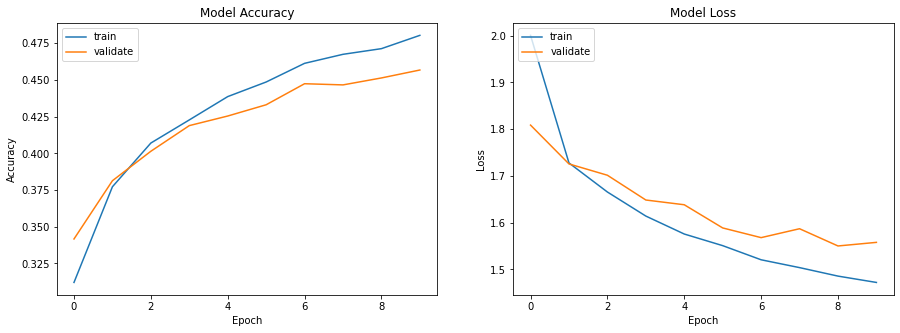

In [ ]:
plotmodelhistory(hist)

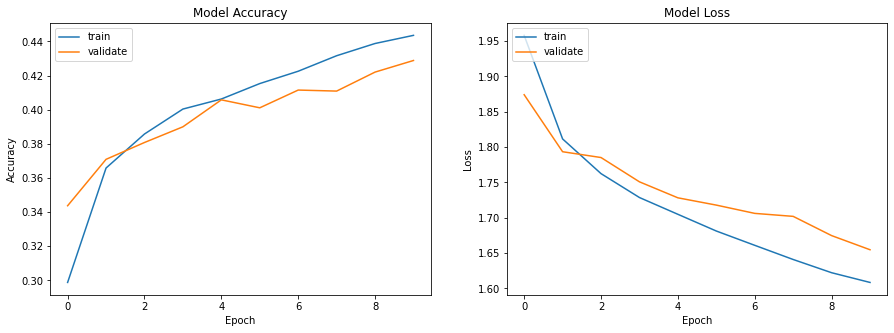

In [ ]:
plotmodelhistory(hist1)

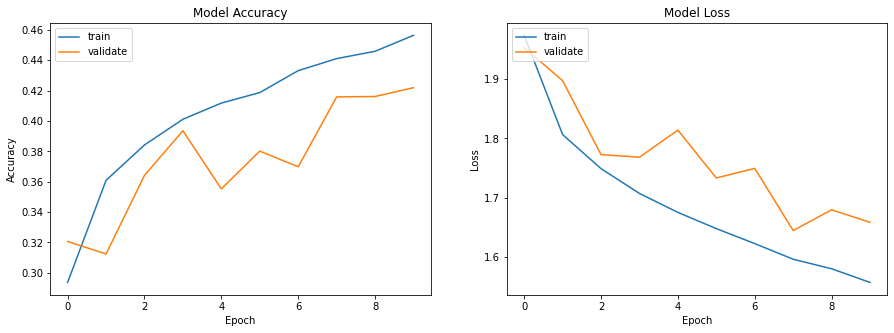

In [ ]:
plotmodelhistory(hist2)

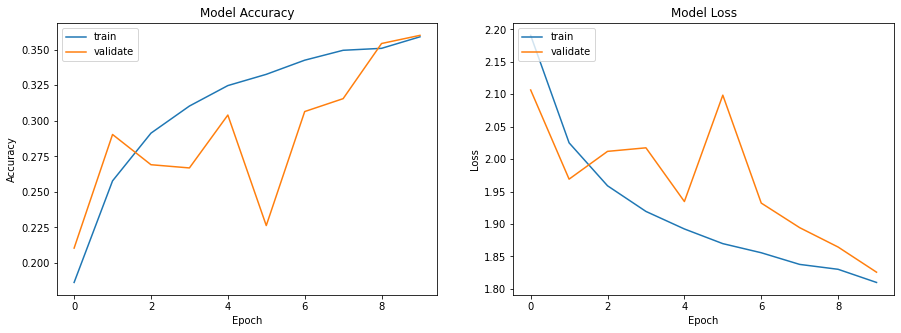

In [ ]:
plotmodelhistory(hist3)

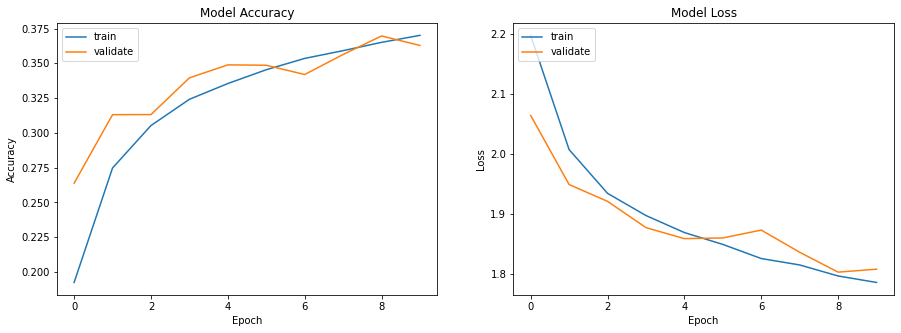

In [ ]:
plotmodelhistory(hist4)

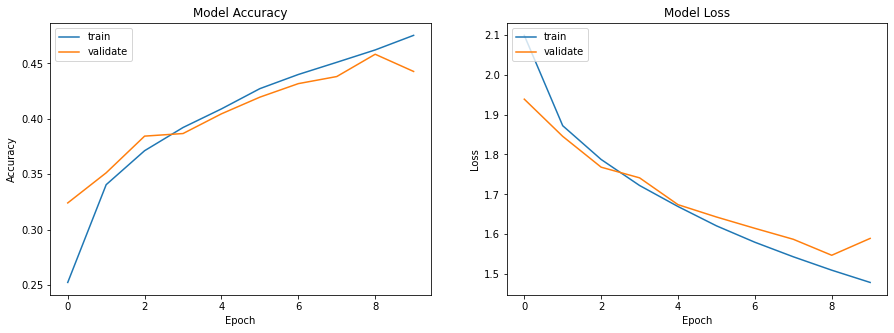

In [ ]:
plotmodelhistory(hist5)

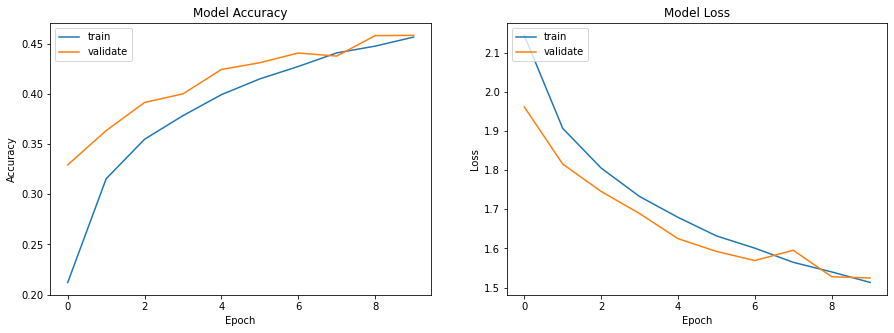

In [ ]:
plotmodelhistory(hist6)

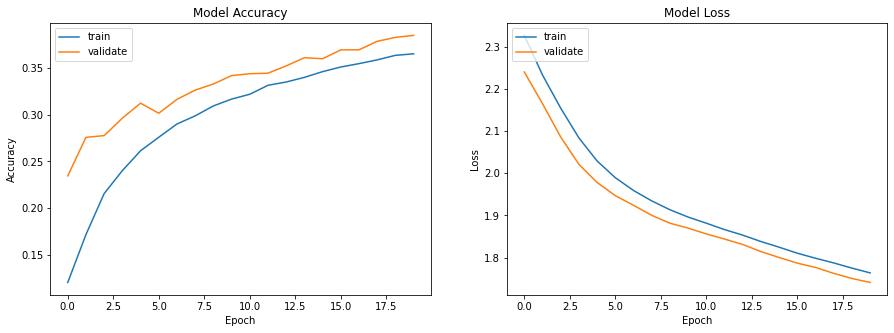

In [ ]:
plotmodelhistory(hist7)

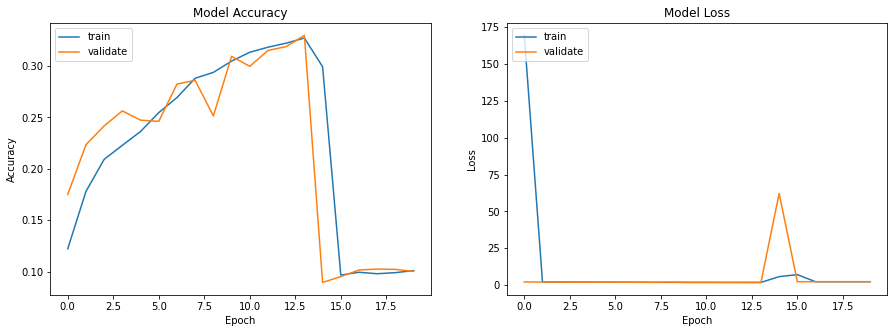

In [ ]:
plotmodelhistory(hist8)

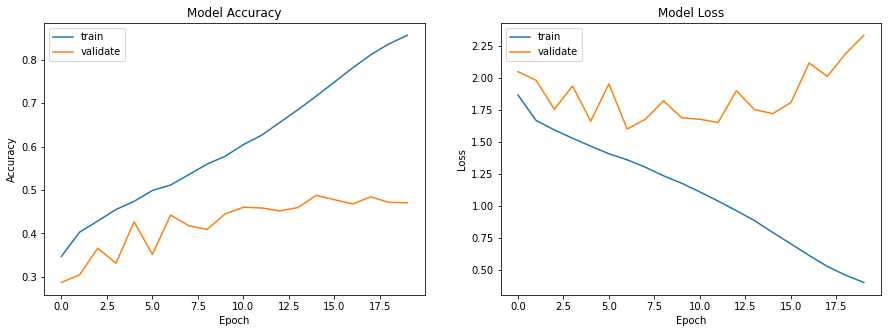

In [ ]:
plotmodelhistory(hist9)